In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
path.ls()
files = get_image_files(path/"images")
len(files)

7390

In [2]:
files[0],files[6]

(Path('/home/amber/.fastai/data/oxford-iiit-pet/images/chihuahua_7.jpg'),
 Path('/home/amber/.fastai/data/oxford-iiit-pet/images/samoyed_58.jpg'))

In [3]:
def label_func(f): return f[0].isupper()


In [4]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))


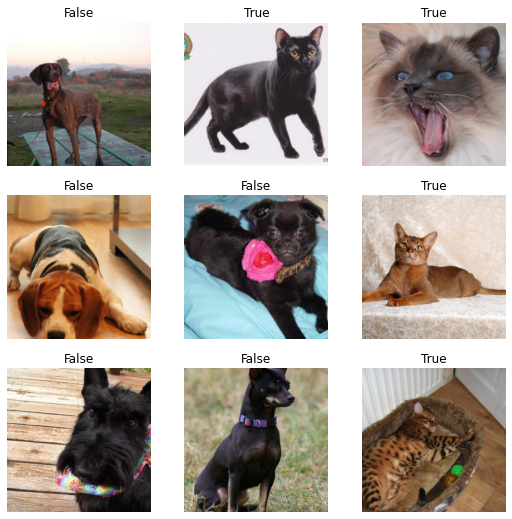

In [5]:
dls.show_batch()


In [7]:
dls

In [38]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=accuracy)
## Fitting 5 epochs
learn.fit_one_cycle(2,1e-2)

NameError: name 'create_cnn' is not defined

In [36]:
class SaveFeatures():
    features=None
    def __init__(self, m): 
        self.hook = m.register_forward_hook(self.hook_fn)
        self.features = None
    def hook_fn(self, module, input, output): 
        out = output.detach().cpu().numpy()
        if isinstance(self.features, type(None)):
            self.features = out
        else:
            self.features = np.row_stack((self.features, out))
    def remove(self): 
        self.hook.remove()

In [32]:
learn.model[1][5]

ReLU(inplace=True)

In [37]:
## Output before the last FC layer
sf = SaveFeatures(learn.model[1][5])
## Converting in a dictionary of {img_path:featurevector}
img_path = [str(x) for x in (list(dls.train_ds.items)+list(dls.valid_ds.items))]
feature_dict = dict(zip(img_path,sf.features))

TypeError: 'NoneType' object is not iterable

In [15]:
sf.features == None

True

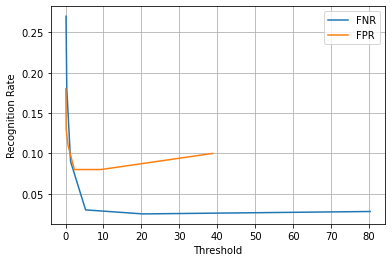